<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=550 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>

<h2 style="text-align: center;"><b>Семинар 6. Основы библиотеки PyTorch </b></h2>


<p style="align: center;"><img src="https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png" width=400 height=100></p>

Этот ноутбук посвящён основам  библиотеки PyTorch.

<h3 style="text-align: center;"><b>Введение</b></h3>

В настоящее время существует множество фреймворков глубокого обучения. Разница между ними заключается во внутренних принципах вычислений. Например, в **[Caffe](http://caffe.berkeleyvision.org/)** и **[Caffe2](https://caffe2.ai/)** вы пишете код, используя некоторые «готовые блоки» "(как и $ LEGO ^ {TM} $ :). В **[TensorFlow](https://www.tensorflow.org/)** и **[Theano](http://deeplearning.net/software/theano/)** вы сначала объявляете граф вычислений, затем компилируйте его и используйте для вывода / обучения (`tf.session ()`). Кстати, теперь в TensorFlow (начиная с версии 1.10) есть функция [Eager Execution](https://www.tensorflow.org/guide/eager), которая может быть полезна для быстрого прототипирования и отладки. **[Keras](https://keras.io/)** - очень популярный и полезный фреймворк DL, который позволяет быстро реализовывать нейронный сети и имеет множество полезных функций.


<p style="align: center;"><img src="https://habrastorage.org/web/e3e/c3e/b78/e3ec3eb78d714a7993a6b922911c0866.png" width=500 height=500></p>  
<p style="text-align: center;"><i>Image credit: https://habr.com/post/334380/</i><p>

Мы будем использовать **PyTorch**, поскольку он активно развивается и поддерживается AI-сообществом 

<h3 style="text-align: center;"><b>Установка</b></h3>

Подробную инструкцию по установке PyTorch вы можете найти на [официальном сайте PyTorch](https://pytorch.org/).

## Синтаксис Фреймворка

In [1]:
#%pip install torch

In [2]:
import torch

Несколько фактов о PyTorch:
- динамический граф вычислений
- удобные модули `torch.nn` и `torchvision` для быстрого прототипирования нейронных сетей
- даже быстрее, чем TensorFlow на некоторых задачах
- позволяет легко использовать **GPU**

По своей сути PyTorch предоставляет две основные функции:

- n-мерный тензор, похожий на **numpy**, но может работать на графических процессорах
- Автоматическая дифференциация для построения и обучения нейронных сетей

Если бы PyTorch был формулой, она была бы такой:

$$PyTorch = NumPy + CUDA + Autograd$$

(CUDA - [wiki](https://en.wikipedia.org/wiki/CUDA))

Давайте посмотрим, как мы можем использовать PyTorch для работы с векторами и тензорами.

Напомним, что **тензор** - это многомерный вектор, например :

`x = np.array ([1,2,3])` - вектор = тензор с 1 размерностью (точнее: `(3,)`)

`y = np.array ([[1, 2, 3], [4, 5, 6]])` - матрица = тензор с двумя измерениями (`(2, 3)` в данном случае)

`z = np.array ([[[1, 2, 3], [4, 5, 6], [7, 8, 9]]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
               [[1, 2, 3], [4, 5, 6], [7, 8, 9]]]) `-" куб "(3, 3, 3) = тензор с тремя измерениями (` ( 3, 3, 3) `в этом случае)


Одним из реальных примеров трехмерного тензора является **изображение**, оно имеет 3 измерения: `высота`, `ширина` и `глубина канала` (глубина канала = 3 для цветных изображений, 1 для оттенков серого). Вы можете думать об этом как о параллелепипеде, состоящем из действительных чисел.


### Типы Тензоров

В PyTorch мы будем использовать `torch.Tensor` (`FloatTensor`, `IntTensor`, `ByteTensor`) для всех вычислений.

Все типы:

In [3]:
torch.HalfTensor      # 16 бит, floating point
torch.FloatTensor     # 32 бита, floating point
torch.DoubleTensor    # 64 бита, floating point

torch.ShortTensor     # 16 бит, integer, signed
torch.IntTensor       # 32 бита, integer, signed
torch.LongTensor      # 64 бита, integer, signed

torch.CharTensor      # 8 бит, integer, signed
torch.ByteTensor      # 8 бит, integer, unsigned

torch.ByteTensor

Мы будем использовать только `torch.FloatTensor()` и `torch.IntTensor()`.

Начнем уже что-нибудь писать!

### Создание тензора

In [4]:
a = torch.FloatTensor([1, 2])
a


tensor([1., 2.])

In [5]:
a.shape

torch.Size([2])

In [6]:
b = torch.FloatTensor([[1,2,3], [4,5,6]])
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [7]:
b.shape

torch.Size([2, 3])

In [8]:
x = torch.FloatTensor(2,3,4)

In [9]:
x

tensor([[[-3.9134e-26,  3.0754e-41,  7.0065e-44,  7.0065e-44],
         [ 6.3058e-44,  6.7262e-44,  7.1466e-44,  6.3058e-44],
         [ 7.1466e-44,  6.8664e-44,  1.1771e-43,  6.8664e-44]],

        [[ 6.7262e-44,  8.1275e-44,  7.1466e-44,  6.7262e-44],
         [ 8.1275e-44,  7.4269e-44,  6.7262e-44,  6.4460e-44],
         [ 6.7262e-44,  7.0065e-44,  7.7071e-44,  7.8473e-44]]])

In [10]:
x = torch.FloatTensor(100)
x

tensor([-2.1477e-26,  3.0754e-41, -9.6447e-30,  3.0754e-41,  5.8154e-43,
         0.0000e+00,         nan,         nan,  4.4721e+21,  2.3079e+20,
         6.2689e+22,  4.7428e+30,  1.3563e-19,  1.3817e-19, -1.0752e+10,
        -9.9222e+10,  1.8910e+23,  7.1443e+31,  1.9603e-19,  1.8061e+28,
         7.5527e+28,  5.2839e-11,  2.7604e+20,  1.7744e+28,  2.0535e-19,
         1.3563e-19,  1.0426e-08, -2.3866e+10, -1.7558e+10,  1.8910e+23,
         7.1443e+31,  1.9603e-19,  1.8061e+28,  7.5527e+28,  5.2839e-11,
         1.1319e+21,  6.2688e+22,  4.7428e+30,  1.3563e-19,  1.6962e-07,
        -2.3866e+10, -1.7558e+10,  1.8910e+23,  7.1443e+31,  1.9603e-19,
         1.8061e+28,  4.3747e+31,  4.2964e+24,  7.1901e+28,  6.2706e+22,
         4.7428e+30,  1.3563e-19,  2.3303e-09, -6.0573e-09, -3.0816e-37,
         1.8037e+28,  6.8296e+22,  1.2690e+31,  7.0364e+22,  7.5527e+28,
         5.2839e-11,  4.1993e+12,  7.5338e+28,  1.3563e-19,  1.3563e-19,
         1.0426e-08, -2.3866e+10, -1.7558e+10,  1.2

In [11]:
x = torch.IntTensor(45, 57, 14, 2)
x.shape

torch.Size([45, 57, 14, 2])

**Примечание:** если вы создаете `torch.Tensor` с помощью следующего конструктора, он будет заполнен мусором из "случайных номеров":

In [12]:
x = torch.IntTensor(3, 2, 4)
x

tensor([[[-1790850304,       21947,          50,          50],
         [         45,          48,          51,          45]],

        [[         51,          49,          84,          49],
         [         48,          58,          51,          48]],

        [[         58,          53,          48,          46],
         [         48,          50,          57,          55]]],
       dtype=torch.int32)

### Инициализации тензоров

In [13]:
x1 = torch.FloatTensor(3, 2, 4)
x1.zero_() # inplace realization, equal the naxt code line
x2 = torch.zeros(3, 2, 4)
x3 = torch.zeros_like(x1)

assert torch.allclose(x1, x2) and torch.allclose(x1, x3)

Инициализация случайного распределения

In [14]:
x = torch.randn((2,3))                # Normal(0, 1) с размером (2, 3)
x

tensor([[ 0.0088,  1.4638, -0.3880],
        [-0.3042,  1.2037,  0.3271]])

In [15]:
x.random_(0, 10)                      # Дискретное равномерно U[0, 10]
x.uniform_(0, 1)                      # Равномерно U[0, 1]
x.normal_(mean=0, std=1)              # Нормальное со средним 0 и дисперсией 1
x.bernoulli_(p=0.5)                   # bernoulli with parameter p

tensor([[0., 1., 1.],
        [1., 0., 0.]])

## Функции в Torch 

У всех функций Numpy есть своя пара в Torch! Осталось теперь вспомнить numpy 🙂

https://github.com/torch/torch7/wiki/Torch-for-Numpy-users

### Изменение формы
`np.reshape()` == `torch.view()`:

In [16]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [17]:
b.view(3, 2).shape # return copy

torch.Size([3, 2])

In [18]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [19]:
b, b.stride()

(tensor([[1., 2., 3.],
         [4., 5., 6.]]), (3, 1))

In [20]:
b.view(3, 2), b.view(3, 2).stride()  

(tensor([[1., 2.],
         [3., 4.],
         [5., 6.]]), (2, 1))

**Примечание:** `torch.view ()` создает новый тензор, но старый остается неизменным

In [21]:
b.view(-1, 2)

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])

In [22]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [23]:
b.T.stride(), b.is_contiguous(), b.T.is_contiguous()

((1, 3), True, False)

<img src='https://lh3.googleusercontent.com/proxy/pbQ8C9YLVguU2LzlfE2-57lC3KK3yIRsQnpaTOK9S2UPpopvnZ3JhgeMcT6_kqYL56xq18ZFqddzPhszZg1W9YY--y-qDD2-bJrjVYivMdpQgRqiumwh6PpJYU3cL5Mua9RNeVp6xK0'>

In [24]:
b.reshape(-1) # возвращает view или contigues тензор

tensor([1., 2., 3., 4., 5., 6.])

In [25]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

### Изменение типа тензора

In [26]:
a = torch.FloatTensor([1.5, 3.2, -7])

In [27]:
a.type_as(torch.IntTensor())

tensor([ 1,  3, -7], dtype=torch.int32)

In [28]:
a.to(torch.int32)

tensor([ 1,  3, -7], dtype=torch.int32)

In [29]:
a.type_as(torch.ByteTensor())

tensor([  1,   3, 249], dtype=torch.uint8)

In [30]:
a.to(torch.uint8)

tensor([  1,   3, 249], dtype=torch.uint8)

**Note:** `.type_as()` creates a new tensor, the old one remains unchanged

In [31]:
a

tensor([ 1.5000,  3.2000, -7.0000])

* Indexing is just like in `NumPy`:

In [32]:
a = torch.FloatTensor([[100, 20, 35], [15, 163, 534], [52, 90, 66]])
a

tensor([[100.,  20.,  35.],
        [ 15., 163., 534.],
        [ 52.,  90.,  66.]])

In [33]:
a[0, 0]

tensor(100.)

In [34]:
a[0:2, 1]

tensor([ 20., 163.])

### Арифметические операции

| операция | аналоги |
|:-:|:-:|
|`+`| `torch.add()` |
|`-`| `torch.sub()` |
|`*`| `torch.mul()` |
|`/`| `torch.div()` |

#### Сложение

In [35]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [36]:
a + b

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [37]:
a.add(b)

tensor([[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [200., 400., 600.]])

In [38]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [39]:
a + b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

#### Вычитание

In [40]:
a - b

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [41]:
a.sub(b) # copy

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

In [42]:
a.sub_(b) # inplace

tensor([[  2.,   4.,   6.],
        [ 20.,  40.,  60.],
        [200., 400., 600.]])

#### Умножение (поэлементное)

In [43]:
a * b

tensor([[-2.0000e+00, -8.0000e+00, -1.8000e+01],
        [-2.0000e+02, -8.0000e+02, -1.8000e+03],
        [-2.0000e+04, -8.0000e+04, -1.8000e+05]])

In [44]:
a.mul(b)

tensor([[-2.0000e+00, -8.0000e+00, -1.8000e+01],
        [-2.0000e+02, -8.0000e+02, -1.8000e+03],
        [-2.0000e+04, -8.0000e+04, -1.8000e+05]])

#### Деление (поэлементное):

In [45]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [46]:
a / b

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

In [47]:
a.div(b)

tensor([[-1., -1., -1.],
        [-1., -1., -1.],
        [ 1.,  1.,  1.]])

**Примечание:** все эти операции создают новые тензоры, старые тензоры остаются неизменными.

In [48]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [49]:
b

tensor([[ -1.,  -2.,  -3.],
        [-10., -20., -30.],
        [100., 200., 300.]])

### Операторы сравнения

In [50]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [51]:
a == b

tensor([[False, False, False],
        [False, False, False],
        [ True,  True,  True]])

In [52]:
a != b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

In [53]:
a < b

tensor([[False, False, False],
        [False, False, False],
        [False, False, False]])

In [54]:
a > b

tensor([[ True,  True,  True],
        [ True,  True,  True],
        [False, False, False]])

### Использование индексации по логической маске

In [55]:
a[a > b]

tensor([ 1.,  2.,  3., 10., 20., 30.])

In [56]:
b[a == b]

tensor([100., 200., 300.])

### Поэлементное применение **универсальных функций**

In [57]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])

In [58]:
a.sin()

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [59]:
torch.sin(a)

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.5440,  0.9129, -0.9880],
        [-0.5064, -0.8733, -0.9998]])

In [60]:
a.tan()

tensor([[ 1.5574, -2.1850, -0.1425],
        [ 0.6484,  2.2372, -6.4053],
        [-0.5872, -1.7925, 45.2447]])

In [61]:
a.exp()

tensor([[2.7183e+00, 7.3891e+00, 2.0086e+01],
        [2.2026e+04, 4.8517e+08, 1.0686e+13],
        [       inf,        inf,        inf]])

In [62]:
a.log()

tensor([[0.0000, 0.6931, 1.0986],
        [2.3026, 2.9957, 3.4012],
        [4.6052, 5.2983, 5.7038]])

In [63]:
b = -a
b

tensor([[  -1.,   -2.,   -3.],
        [ -10.,  -20.,  -30.],
        [-100., -200., -300.]])

In [64]:
b.abs()

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

### Агрегация и работа с осями
#### sum, mean, max, min:

In [65]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [66]:
a.mean()

tensor(74.)

#### Применение функции вдоль оси

In [67]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [68]:
a.sum(dim=0)

tensor([111., 222., 333.])

In [69]:
a.sum(dim=1)

tensor([  6.,  60., 600.])

In [70]:
a.max()

tensor(300.)

In [71]:
a.max(0)

torch.return_types.max(values=tensor([100., 200., 300.]), indices=tensor([2, 2, 2]))

**Примечание:** второй тензор, возвращаемый `.max()`, содержит индексы элементов max вдоль этой оси. Например. в этом случае `a.max ()` вернула `(100, 200, 300)`, которые являются минимальными элементами по оси 0 (вдоль столбцов), а их индексы по оси 0 равны `(2, 2, 2)`.


#### Фиктивные оси

Иногда очень сложно бывает разобраться, как правильно выбрать оси для применения операций с многомерными массивами. Поэтому сейчас мы решим на эту тему пару задач.
Сначала посмотрим, как создавать у массивов новые фиктивные оси, это нам пригодится.

In [72]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [73]:

a[:, None, :].shape

torch.Size([3, 1, 3])

In [74]:
a[:, None, :]

tensor([[[  1.,   2.,   3.]],

        [[ 10.,  20.,  30.]],

        [[100., 200., 300.]]])

In [75]:
a[:, :, None]

tensor([[[  1.],
         [  2.],
         [  3.]],

        [[ 10.],
         [ 20.],
         [ 30.]],

        [[100.],
         [200.],
         [300.]]])

#### Безобидная задача на кумулятивные суммы
Дана матрица $M \times N$. Напишите функцию, которая возвращает вектор средних значений по вертикали. 



In [76]:
def vertical_means(A):
    """
    param A: torch.tensor[m,n]
    """

    result = A.mean(dim=0)

    return result # <YOUR CODE>

A = torch.FloatTensor([[1, 4], 
                       [2, 7]] )

vertical_means(A)

tensor([1.5000, 5.5000])

**Проблемы:**

* Что такое вертикальная ось? 
* По какой оси необходимо суммировать?
* Как не ошибиться?

**Ответ:** Операции всегда производятся по той оси, которая **исчезнет** после применения операции.

#### Задача на нормализацию изображения
Реализуйте функцию ``normalize_pictures(A)``, которая принимает на вход четырёхмерный тензор --- батч из ``batch_size`` изображений, каждое из которых является трехмерным тензором формы (num_channels, width, height). Нужно стандартизировать изображение по каждому каналу, то есть сделать так, чтобы среднее значение яркости каждого канала (по всем изображениям и всем пикселям) было равно 0, а стандартное отклонение --- 1.

In [77]:
def normalize_pictures(A):
    """
    param A: torch.Tensor[batch_size, num_channels, width, height]
    """

    m = A.mean(dim=(2,3))
    sigma = A.std(dim =(2, 3))

    result = (A - m[:, :, None, None])/sigma[:, :, None, None]


    return result

In [78]:
batch = torch.randint(0, 156, (64, 3, 300, 300), dtype=torch.float32)
batch.mean(dim=(2,3)).shape

torch.Size([64, 3])

In [79]:
batch = torch.randint(0, 256, (64, 3, 300, 300), dtype=torch.float32)

B = normalize_pictures(batch)
print(B.mean(dim=(2,3)).shape)
print(B.std(dim=(2,3)))

torch.Size([64, 3])
tensor([[1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0

## Матричные операции

#### Транспонирование тензора

In [80]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

In [81]:
a.t()

tensor([[  1.,  10., 100.],
        [  2.,  20., 200.],
        [  3.,  30., 300.]])

Это тоже не inplace-операция:

In [82]:
a

tensor([[  1.,   2.,   3.],
        [ 10.,  20.,  30.],
        [100., 200., 300.]])

#### Скалярное произведение векторов

In [83]:
a = torch.FloatTensor([1, 2, 3, 4, 5, 6])
b = torch.FloatTensor([-1, -2, -4, -6, -8, -10])

In [84]:
a.dot(b)

tensor(-141.)

In [85]:
a.shape, b.shape

(torch.Size([6]), torch.Size([6]))

In [86]:
a @ b

tensor(-141.)

In [87]:
type(a)

torch.Tensor

In [88]:
type(b)

torch.Tensor

In [89]:
type(a @ b)

torch.Tensor

#### Матричное произведение

In [90]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1, -2, -3], [-10, -20, -30], [100, 200, 300]])

In [91]:
a.mm(b)

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [92]:
a @ b

tensor([[  279.,   558.,   837.],
        [ 2790.,  5580.,  8370.],
        [27900., 55800., 83700.]])

In [93]:
a = torch.FloatTensor([[1, 2, 3], [10, 20, 30], [100, 200, 300]])
b = torch.FloatTensor([[-1], [-10], [100]])

In [94]:
print(a.shape, b.shape)

torch.Size([3, 3]) torch.Size([3, 1])


In [95]:
a @ b

tensor([[  279.],
        [ 2790.],
        [27900.]])

Тензор `b` можно развернуть в одномерный массив с помощью функции `torch.view(-1)`, чтобы результат был вектором

In [96]:
b

tensor([[ -1.],
        [-10.],
        [100.]])

In [97]:
b.view(-1)

tensor([ -1., -10., 100.])

In [98]:
a @ b.view(-1)

tensor([  279.,  2790., 27900.])

In [99]:
a.mv(b.view(-1))

tensor([  279.,  2790., 27900.])

In [100]:
y = torch.Tensor(2, 3, 4, 5)
z = torch.Tensor(2, 3, 5, 6)
(y @ z).shape

torch.Size([2, 3, 4, 6])

## Конвертация
#### Конвертация из Numpy в Pytorch:

In [101]:
import numpy as np

a = np.random.rand(3, 3)
a

array([[0.12474047, 0.62341418, 0.66843313],
       [0.02784663, 0.24679044, 0.00793789],
       [0.62719305, 0.83438902, 0.47436651]])

In [102]:
b = torch.from_numpy(a)
b

tensor([[0.1247, 0.6234, 0.6684],
        [0.0278, 0.2468, 0.0079],
        [0.6272, 0.8344, 0.4744]], dtype=torch.float64)

**Внимание!** `a` и `b` хранятся в одной и той же ячейке данных. Если именить один тензор, то изменится и другой.

In [103]:
b -= b
b

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float64)

In [104]:
a

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Конвертация из Torch в Numpy

In [105]:
a = torch.FloatTensor(2, 3, 4)
a

tensor([[[-3.9152e-26,  3.0754e-41,  7.0065e-44,  7.0065e-44],
         [ 6.3058e-44,  6.7262e-44,  7.1466e-44,  6.3058e-44],
         [ 7.1466e-44,  6.8664e-44,  1.1771e-43,  6.8664e-44]],

        [[ 6.7262e-44,  8.1275e-44,  7.1466e-44,  6.7262e-44],
         [ 8.1275e-44,  7.4269e-44,  6.7262e-44,  6.4460e-44],
         [ 6.8664e-44,  7.1466e-44,  7.9874e-44,  7.0065e-44]]])

In [106]:
type(a)

torch.Tensor

In [107]:
x = a.numpy()
x

array([[[-3.915235e-26,  3.075430e-41,  7.006492e-44,  7.006492e-44],
        [ 6.305843e-44,  6.726233e-44,  7.146622e-44,  6.305843e-44],
        [ 7.146622e-44,  6.866362e-44,  1.177091e-43,  6.866362e-44]],

       [[ 6.726233e-44,  8.127531e-44,  7.146622e-44,  6.726233e-44],
        [ 8.127531e-44,  7.426882e-44,  6.726233e-44,  6.445973e-44],
        [ 6.866362e-44,  7.146622e-44,  7.987401e-44,  7.006492e-44]]],
      dtype=float32)

In [108]:
x.shape

(2, 3, 4)

In [109]:
type(x)

numpy.ndarray

In [110]:
x -= x

In [111]:
a

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

#### Задание. Реализация функции forward
Реализуйте функцию `forward_pass(X, w)` для одного нейрона нейронной сети с активацией ``sigmoid``. Используйте библиотеку PyTorch

<img src='https://radioprog.ru/uploads/media/articles/0001/05/267ad35a9e64a7b92c2e3b94940f686816ea6bf8.jpeg'>

In [112]:
def forward_pass(X, w):

  logits = X @ w
  result  = torch.sigmoid(logits)

  return result

In [113]:
X = torch.FloatTensor([[-5, 5], [2, 3], [1, -1]])
print(X.shape)
w = torch.FloatTensor([[-0.5], [2.5]])
print(w.shape)
result = forward_pass(X, w)
print('result: {}'.format(result))

torch.Size([3, 2])
torch.Size([2, 1])
result: tensor([[1.0000],
        [0.9985],
        [0.0474]])


## <h1 style="text-align: center;"><a href="https://ru.wikipedia.org/wiki/CUDA">CUDA</a></h3>

CUDA --- это программно-аппаратная архитектура параллельных вычислений, которая позволяет существенно увеличить вычислительную производительность благодаря использованию графических процессоров фирмы Nvidia. Для нас CUDA --- это драйвер, который позволяет нам проводить вычисления на GPU.

[CUDA documentation](https://docs.nvidia.com/cuda/)

Для вычислений на Pytorch мы можем использовать как CPU (Central Processing Unit), так и GPU (Graphical Processing Unit). Между ними можно легко переключаться, и это очень важно!

In [114]:
x = torch.FloatTensor(1024, 10024).uniform_()
x

tensor([[0.6152, 0.6582, 0.9832,  ..., 0.7897, 0.8209, 0.9519],
        [0.0576, 0.0159, 0.1138,  ..., 0.1820, 0.3507, 0.2870],
        [0.9625, 0.7824, 0.6779,  ..., 0.8327, 0.9625, 0.8115],
        ...,
        [0.0825, 0.2453, 0.9544,  ..., 0.1544, 0.8004, 0.8202],
        [0.2402, 0.6029, 0.1585,  ..., 0.8395, 0.0087, 0.9892],
        [0.0940, 0.1420, 0.3597,  ..., 0.9780, 0.9304, 0.2062]])

In [115]:
x.is_cuda

False

#### Кладём тензор на GPU

In [116]:
!nvidia-smi

Thu Mar 31 10:30:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8    25W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [117]:
x = x.cuda()

In [118]:
!nvidia-smi

Thu Mar 31 10:32:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    58W / 149W |    554MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [124]:
x

tensor([[0.6152, 0.6582, 0.9832,  ..., 0.7897, 0.8209, 0.9519],
        [0.0576, 0.0159, 0.1138,  ..., 0.1820, 0.3507, 0.2870],
        [0.9625, 0.7824, 0.6779,  ..., 0.8327, 0.9625, 0.8115],
        ...,
        [0.0825, 0.2453, 0.9544,  ..., 0.1544, 0.8004, 0.8202],
        [0.2402, 0.6029, 0.1585,  ..., 0.8395, 0.0087, 0.9892],
        [0.0940, 0.1420, 0.3597,  ..., 0.9780, 0.9304, 0.2062]],
       device='cuda:0')

In [122]:
x = x.cpu()
!nvidia-smi

torch.cuda.empty_cache()
!nvidia-smi

Thu Mar 31 10:33:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0    59W / 149W |    556MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Удобный способой перевода на ЦПУ/ГПУ

In [123]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

x = x.to(device)
x

tensor([[0.6152, 0.6582, 0.9832,  ..., 0.7897, 0.8209, 0.9519],
        [0.0576, 0.0159, 0.1138,  ..., 0.1820, 0.3507, 0.2870],
        [0.9625, 0.7824, 0.6779,  ..., 0.8327, 0.9625, 0.8115],
        ...,
        [0.0825, 0.2453, 0.9544,  ..., 0.1544, 0.8004, 0.8202],
        [0.2402, 0.6029, 0.1585,  ..., 0.8395, 0.0087, 0.9892],
        [0.0940, 0.1420, 0.3597,  ..., 0.9780, 0.9304, 0.2062]],
       device='cuda:0')

Умножим два тензора в GPU и вернём результат обратно на CPU:

In [137]:
a = torch.FloatTensor(10000, 10000).uniform_()
b = torch.FloatTensor(10000, 10000).uniform_()
c = a.cuda().mul(b.cuda()).cpu()

In [126]:
c

tensor([[0.0251, 0.2305, 0.6523,  ..., 0.0592, 0.1178, 0.0687],
        [0.0374, 0.6176, 0.0096,  ..., 0.5626, 0.2275, 0.0362],
        [0.2201, 0.3112, 0.3644,  ..., 0.6394, 0.0558, 0.7459],
        ...,
        [0.2372, 0.1531, 0.0760,  ..., 0.0680, 0.7345, 0.3303],
        [0.8909, 0.3358, 0.1624,  ..., 0.0098, 0.0201, 0.1935],
        [0.0550, 0.0304, 0.3508,  ..., 0.1363, 0.3058, 0.4290]])

In [127]:
a

tensor([[0.0346, 0.2976, 0.9788,  ..., 0.1140, 0.1342, 0.7839],
        [0.6598, 0.6327, 0.8663,  ..., 0.7061, 0.6690, 0.0784],
        [0.7124, 0.7817, 0.9670,  ..., 0.9397, 0.3509, 0.8556],
        ...,
        [0.3943, 0.4005, 0.0836,  ..., 0.3510, 0.9164, 0.5134],
        [0.9595, 0.4254, 0.1834,  ..., 0.1568, 0.0992, 0.2477],
        [0.9430, 0.1982, 0.3629,  ..., 0.9855, 0.4429, 0.5108]])

Тензоры из разных областей памяти не совместимы:

In [138]:
a = torch.FloatTensor(10000, 10000).uniform_().cpu()
b = torch.FloatTensor(10000, 10000).uniform_().cuda()

In [ ]:
a + b

RuntimeError: ignored

### Пример работы на GPU

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [139]:
x = torch.FloatTensor(5, 5, 5).uniform_()

# проверить наличие CUDA (NVIDIA GPU)
if torch.cuda.is_available():
    # получить имя устройства CUDA
    device = torch.device('cuda')          # Объект CUDA-устройства
    y = torch.ones_like(x, device=device)  # создаем тензор на GPU
    x = x.to(device)                       # или просто `.to("cuda")`
    z = x + y
    print(z)
    # вы можете установить тип во время операции `.to`
    print(z.to("cpu", torch.double))

tensor([[[1.7063, 1.4750, 1.2276, 1.7523, 1.4049],
         [1.3869, 1.6311, 1.7740, 1.2658, 1.4127],
         [1.5529, 1.2748, 1.3835, 1.5655, 1.7126],
         [1.3132, 1.5652, 1.7782, 1.7928, 1.6647],
         [1.2433, 1.8936, 1.6671, 1.7121, 1.4216]],

        [[1.0130, 1.8276, 1.6246, 1.2229, 1.5399],
         [1.8321, 1.4671, 1.7405, 1.1040, 1.5557],
         [1.1068, 1.5182, 1.0166, 1.9734, 1.7935],
         [1.3533, 1.2881, 1.6406, 1.5526, 1.8521],
         [1.8552, 1.6599, 1.3428, 1.8215, 1.9576]],

        [[1.0012, 1.0786, 1.8701, 1.4099, 1.7189],
         [1.0175, 1.4195, 1.6537, 1.1808, 1.4588],
         [1.2695, 1.5470, 1.4540, 1.5368, 1.1987],
         [1.9200, 1.8454, 1.7007, 1.9713, 1.3406],
         [1.5413, 1.6374, 1.0155, 1.1869, 1.2981]],

        [[1.7685, 1.9484, 1.1500, 1.5436, 1.8334],
         [1.8987, 1.9369, 1.8420, 1.1812, 1.4225],
         [1.1699, 1.1372, 1.9524, 1.2254, 1.9185],
         [1.9713, 1.6813, 1.5288, 1.6267, 1.4832],
         [1.1453, 1.5164,

## AutoGrad

За что мы любим PyTorch --- за то, что в нём можно автоматически дифференцировать функции! Об этом можно было бы только мечтать в Numpy. Дифференцирование функций происходит по формуле производной композиции.

**Правило производной композиции (a.k.a. backpropagation)**

Пусть есть функция $f(w(\theta))$. Вычислим её производную:
$${\frac  {\partial{f}}{\partial{\theta}}}
={\frac  {\partial{f}}{\partial{w}}}\cdot {\frac  {\partial{w}}{\partial{\theta}}}$$


*Как рассказывалось на лекции, в многомерном случае можно записать аналог этой формулы:*
$$
D_\theta(f\circ w) = D_{w(\theta)}(f)\circ D_\theta(w)
$$

Простой пример обратного распространения градиента:

$$y = \sin \left(x_2^2(x_1 + x_2)\right)$$

<img src="https://ars.els-cdn.com/content/image/1-s2.0-S0010465515004099-gr1.jpg" width=700></img>


Autograd позволяет производить автоматическое дифференцирование для всех операций на тензорах. Граф вычислений, в отличие от Tensorflow, строится динамически. Давайте посмотрим, как это работает.

#### Задание. Реализуйте обучение в логистической регрессии

In [ ]:
# Разберем пример: применим линейную регрессию цен на жилье в Бостоне.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

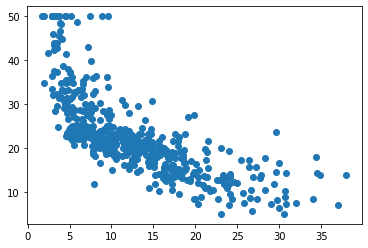

In [141]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline

from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)
None

In [142]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [143]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

In [145]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


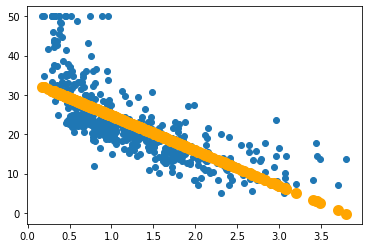

loss =  38.668156


In [147]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b

    # Вычисляем функцию ошибок
    loss = torch.mean((y_pred - y)**2)

    # Вычисляем градиенты
    loss.backward()


    # Делаем шаг градиентного спуска по матрице весов
    w.data -= 0.05*w.grad.data
    b.data -= 0.05*b.grad.data

    # обнуляем градиенты
    w.grad.data.zero_()
    b.grad.data.zero_()



    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

Посмотрим градиенты на примере двухслойной сети

In [148]:
dtype = torch.float
device = torch.device("cuda:0")
# device = torch.device("cuda:0") # Раскомментируйте это, чтобы запустить на GPU

# N - размер батча; D_in - входной размер;
# H - размер скрытого слоя; D_out - размер вывода.
N, D_in, H, D_out = 64, 3, 3, 10
N, D_in, H, D_out = 64, 3, 3, 10

# Создание случайных тензоров для хранения входных и выходных данных.
# Настройка requires_grad = False указывает, что нам не нужно вычислять градиенты
# по отношению к этим тензорам во время обратного прохода.
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)

# Создаем тензоры случайных весов.
# Настройка requires_grad = True указывает, что мы хотим вычислять градиенты с
# уважение к этим тензорам во время обратного прохода.

# Create random Tensors for weights.
# Установка requires_grad = True указывает, что мы хотим вычислить градиенты 
# относительно этих тензоров во время обратного прохода.
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)

In [150]:
y_pred = (x @ w1).clamp(min=0).matmul(w2)
loss = (y_pred - y).pow(2).sum()

# вычисляем градиенты
loss.backward()

In [151]:
print((y_pred - y).pow(2).sum())

tensor(1838.9771, device='cuda:0', grad_fn=<SumBackward0>)


In [152]:
w1.grad, w2.grad

(tensor([[  368.7816,   546.1637,  -463.6481],
         [-1043.1340, -1491.6526,  1267.4487],
         [ -762.0441,  -546.2084,   770.9975]], device='cuda:0'),
 tensor([[ -443.8810,   -40.1662,  -181.8093,   106.8646,   331.9453,   -29.8599,
             86.4339,   331.9987,  -845.1512,  -125.1633],
         [ -928.9766,   -76.4074,  -369.6237,   220.1848,   684.0796,   -70.5497,
            178.8335,   682.7761, -1757.8671,  -255.8508],
         [ -429.4583,    -5.2751,  -131.1173,    95.7368,   286.6295,   -59.2716,
             75.5480,   277.9562,  -771.3682,  -101.7390]], device='cuda:0'))

In [153]:
loss.grad # нет доступа к нелистовым градиентам в дереве AD

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [154]:
# заставляем переменную запоминать градиенты фнукции потерь
y_pred = (x @ w1).clamp(min=0).matmul(w2)
y_pred.retain_grad()

loss = (y_pred - y).pow(2).sum()
loss.retain_grad()

loss.backward()

In [155]:
loss.grad

tensor(1., device='cuda:0')

In [156]:
x.grad # не требует градиента

In [157]:
y.grad # не требует градиента

**Замечание:** Градиенты помещаются в поле `.grad` тензоров, на которых они вычисляются.

In [158]:
w1

tensor([[ 0.4378,  0.9064,  0.5335],
        [-1.2078, -2.5513, -1.1932],
        [-0.6893, -1.3248, -0.2380]], device='cuda:0', requires_grad=True)

In [159]:
with torch.no_grad():
  
    pass

## Дополнительные материалы

*1). Official PyTorch tutorials: https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py*

*2). arXiv article about the deep learning frameworks comparison: https://arxiv.org/pdf/1511.06435.pdf*

*3). Useful repo with different tutorials: https://github.com/yunjey/pytorch-tutorial*

*4). Facebook AI Research (main contributor of PyTorch) website: https://facebook.ai/developers/tools*